In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from fractions import Fraction
from model_scoring1 import ModelScorer

%matplotlib inline 

In [2]:
results_df1 = pd.read_csv("Final_evaluated_1.csv")
results_df2 = pd.read_csv("Final_evaluated_2.csv")
results_df3 = pd.read_csv("Final_evaluated_3.csv")

In [3]:
def process_scores(results_df):
    """
    Processes the DataFrame to convert 'Human_EvaluatorScore' from a string fraction to float and 
    converts 'Max_Score' to numeric.
    
    Parameters:
    results_df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: The processed DataFrame with updated scores.
    """
    # Convert 'Human_EvaluatorScore' to float if it's a fraction, otherwise convert to numeric
    results_df['Human_EvaluatorScore'] = results_df['Human_EvaluatorScore'].apply(
        lambda x: float(Fraction(x)) if isinstance(x, str) and '/' in x else pd.to_numeric(x)
    )
    
    # Convert 'Max_Score' to numeric
    results_df['Max_Score'] = pd.to_numeric(results_df['Max_Score'])
    
    return results_df


# Process each DataFrame
results_df1 = process_scores(results_df1)
results_df2 = process_scores(results_df2)
results_df3 = process_scores(results_df3)

In [4]:
results_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   question                71 non-null     object 
 1   model_answer            71 non-null     object 
 2   expected_answer         71 non-null     object 
 3   category                71 non-null     object 
 4   response_time           71 non-null     float64
 5   Human_EvaluatorScore    71 non-null     float64
 6   Max_Score               71 non-null     int64  
 7   Extracted Model Answer  71 non-null     object 
 8   Gemini Score            71 non-null     float64
 9   Evaluation Reasoning    71 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 5.7+ KB


Summary Statistics:
        Human_EvaluatorScore  Gemini Score
count            213.000000    213.000000
mean               0.794210      0.665634
std                0.776123      0.695463
min                0.000000      0.000000
25%                0.000000      0.000000
50%                1.000000      0.500000
75%                1.000000      1.000000
max                4.000000      4.000000
Correlation between Human Evaluator Score and Gemini Score: 0.78


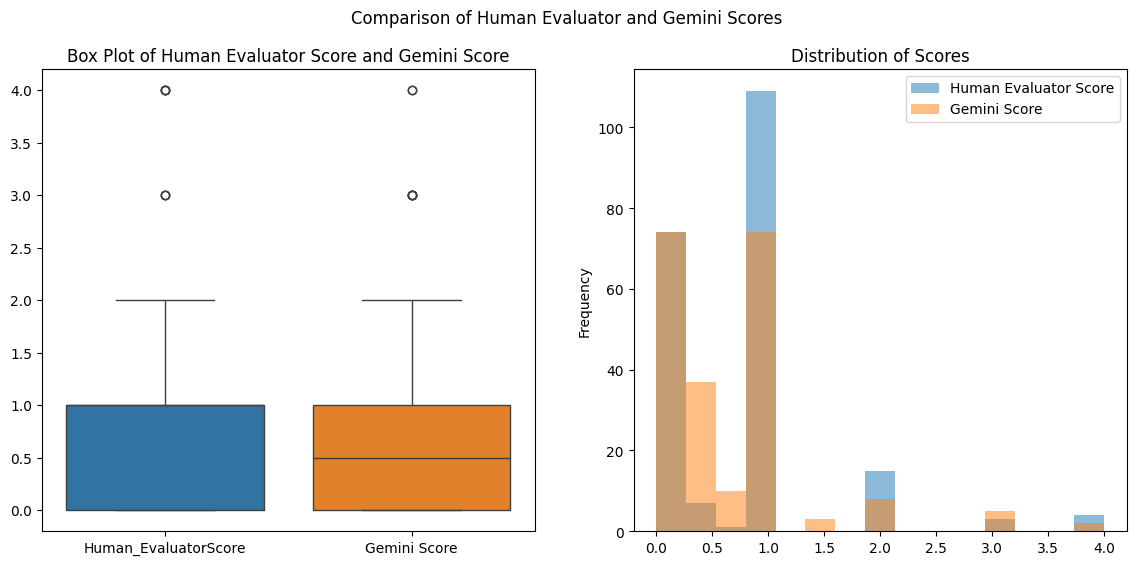

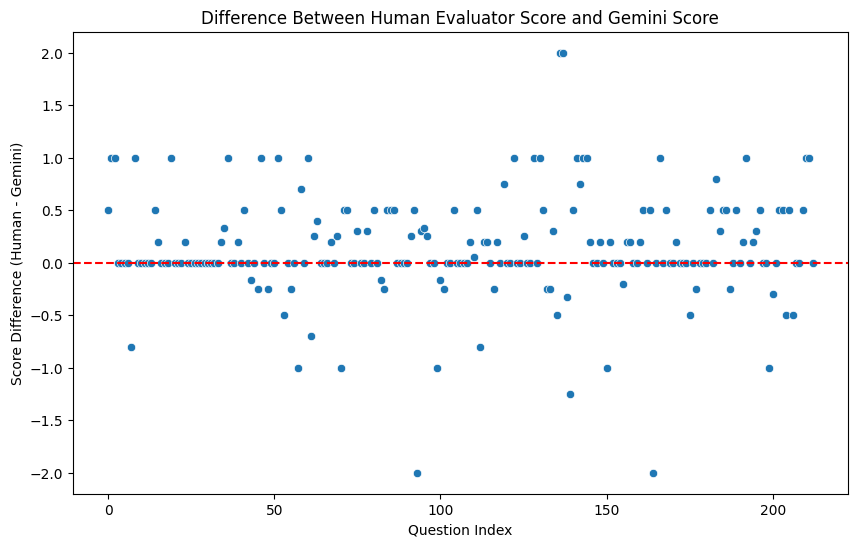

In [5]:
# Concatenate DataFrames
all_results_df = pd.concat([results_df1, results_df2, results_df3], ignore_index=True)

# Summary statistics
summary_stats = all_results_df[['Human_EvaluatorScore', 'Gemini Score']].describe()
print("Summary Statistics:\n", summary_stats)

# Correlation
correlation = all_results_df[['Human_EvaluatorScore', 'Gemini Score']].corr().iloc[0, 1]
print(f"Correlation between Human Evaluator Score and Gemini Score: {correlation:.2f}")

# Visualizations
plt.figure(figsize=(14, 6))

# Box plots
plt.subplot(1, 2, 1)
sb.boxplot(data=all_results_df[['Human_EvaluatorScore', 'Gemini Score']])
plt.title('Box Plot of Human Evaluator Score and Gemini Score')

# Histogram for each score
plt.subplot(1, 2, 2)
all_results_df['Human_EvaluatorScore'].plot(kind='hist', alpha=0.5, bins=15, label='Human Evaluator Score')
all_results_df['Gemini Score'].plot(kind='hist', alpha=0.5, bins=15, label='Gemini Score')
plt.legend()
plt.title('Distribution of Scores')
plt.suptitle('Comparison of Human Evaluator and Gemini Scores')

plt.show()

# Scatter plot with differences
plt.figure(figsize=(10, 6))
all_results_df['Score_Difference'] = all_results_df['Human_EvaluatorScore'] - all_results_df['Gemini Score']
sb.scatterplot(x=range(len(all_results_df)), y='Score_Difference', data=all_results_df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Between Human Evaluator Score and Gemini Score')
plt.xlabel('Question Index')
plt.ylabel('Score Difference (Human - Gemini)')
plt.show()

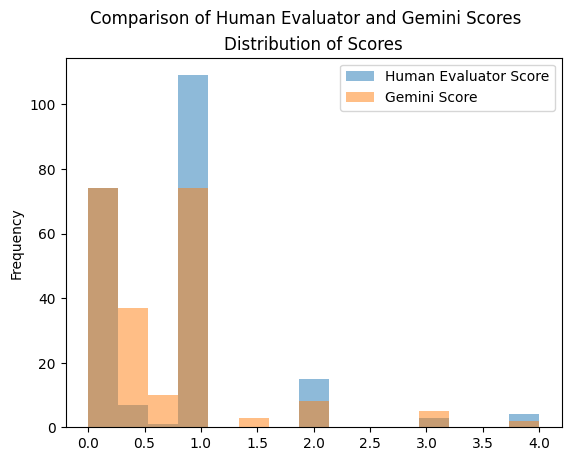

In [17]:
# Plot histograms for Human_EvaluatorScore and Gemini Score
all_results_df['Human_EvaluatorScore'].plot(kind='hist', alpha=0.5, bins=15, label='Human Evaluator Score')
all_results_df['Gemini Score'].plot(kind='hist', alpha=0.5, bins=15, label='Gemini Score')

# Add legend and titles
plt.legend()
plt.title('Distribution of Scores')
plt.suptitle('Comparison of Human Evaluator and Gemini Scores')

# Save the plot as a PNG file
plt.savefig("score_distribution_comparison.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

## Evaluation With Custom script

In [6]:
# Initialize the scorer with desired parameters
scorer = ModelScorer(alpha=0.5, W_accuracy=0.8, W_time=0.2)

In [7]:
# Compute the scores
results_df1 = scorer.compute_scores(results_df1)

# Display the results
print(results_df1[['category', 'Final_Score', 'Normalized_Final_Score']])

                          category  Final_Score  Normalized_Final_Score
0          Food and Sustainability     0.453999                0.500224
1                   Carbon Sources     0.054873                0.006603
2                     Carbon Sinks     0.324411                0.339955
3                     Carbon Cycle     0.059802                0.012699
4                     Human Impact     0.853537                0.994354
..                             ...          ...                     ...
66  Emissions Reduction Strategies     0.051780                0.002778
67         Fossil Fuel Consumption     0.695699                0.799148
68                Greenhouse Gases     0.852729                0.993354
69                    Carbon Cycle     0.652865                0.746172
70         Human Impact on Climate     0.451282                0.496863

[71 rows x 3 columns]


In [8]:
# Grouping by category and calculating the average for each scoring metric
summary_df1 = results_df1.groupby('category').agg({
    'Gemini Score': 'mean',
    'Max_Score': 'mean',
    'Accuracy_Ratio': 'mean',
    'Time_Penalty': 'mean',
    'Final_Score': 'mean',
    'Normalized_Final_Score': 'mean'
}).reset_index()

# Display the summary
summary_df1

,category,Gemini Score,Max_Score,Accuracy_Ratio,Time_Penalty,Final_Score,Normalized_Final_Score
0,Air Quality,0.000000,1.0,0.000000,0.276760,0.055352,0.007195
1,Awareness,0.800000,1.0,0.800000,0.279950,0.695990,0.799507
2,Biodiversity,0.800000,1.0,0.800000,0.286506,0.697301,0.801129
3,CO2 Lifetime,0.700000,1.0,0.700000,0.274738,0.614948,0.699278
4,Carbon Cycle,0.250000,1.0,0.250000,0.293971,0.258794,0.258804
5,Carbon Dioxide Increase,0.500000,1.0,0.500000,0.257431,0.451486,0.497116
6,Carbon Footprint,0.750000,1.0,0.750000,0.286015,0.657203,0.751537
7,Carbon Footprint Reduction,2.000000,2.5,0.875000,0.276695,0.755339,0.872907
8,Carbon Management,0.000000,1.0,0.000000,0.278324,0.055665,0.007582
9,Carbon Sinks,1.000000,3.0,0.333333,0.288721,0.324411,0.339955


In [9]:
np.mean(summary_df1["Normalized_Final_Score"])

0.4438666790393919

In [10]:
# Compute the scores
results_df2 = scorer.compute_scores(results_df2)

# Display the results
print(results_df2[['category', 'Final_Score', 'Normalized_Final_Score']])

                          category  Final_Score  Normalized_Final_Score
0          Food and Sustainability     0.455732                0.500166
1                   Carbon Sources     0.657818                0.748514
2                     Carbon Sinks     0.057324                0.010552
3                     Carbon Cycle     0.053508                0.005862
4                     Human Impact     0.616010                0.697135
..                             ...          ...                     ...
66  Emissions Reduction Strategies     0.053184                0.005464
67         Fossil Fuel Consumption     0.315757                0.328147
68                Greenhouse Gases     0.452940                0.496734
69                    Carbon Cycle     0.452818                0.496584
70         Human Impact on Climate     0.441961                0.483242

[71 rows x 3 columns]


In [11]:
# Grouping by category and calculating the average for each scoring metric
summary_df2 = results_df2.groupby('category').agg({
    'Gemini Score': 'mean',
    'Max_Score': 'mean',
    'Accuracy_Ratio': 'mean',
    'Time_Penalty': 'mean',
    'Final_Score': 'mean',
    'Normalized_Final_Score': 'mean'
}).reset_index()

# Display the summary
summary_df2

,category,Gemini Score,Max_Score,Accuracy_Ratio,Time_Penalty,Final_Score,Normalized_Final_Score
0,Air Quality,0.800000,1.00,0.800000,0.298872,0.699774,0.800075
1,Awareness,0.700000,1.00,0.700000,0.259298,0.611860,0.692034
2,Biodiversity,0.200000,1.00,0.200000,0.256659,0.211332,0.199816
3,CO2 Lifetime,0.250000,1.00,0.250000,0.238541,0.247708,0.244520
4,Carbon Cycle,0.500000,1.00,0.500000,0.265382,0.453076,0.496902
5,Carbon Dioxide Increase,0.000000,1.00,0.000000,0.263937,0.052787,0.004977
6,Carbon Footprint,0.750000,1.00,0.750000,0.277163,0.655433,0.745582
7,Carbon Footprint Reduction,2.000000,2.50,0.875000,0.268797,0.753759,0.866419
8,Carbon Management,0.800000,1.00,0.800000,0.282168,0.696434,0.795970
9,Carbon Sinks,0.000000,3.00,0.000000,0.286619,0.057324,0.010552


In [12]:
np.mean(summary_df2["Normalized_Final_Score"])

0.4703733188388942

In [13]:
# Compute the scores
results_df3 = scorer.compute_scores(results_df3)

# Display the results
print(results_df3[['category', 'Final_Score', 'Normalized_Final_Score']])

                          category  Final_Score  Normalized_Final_Score
0          Food and Sustainability     0.253928                0.248666
1                   Carbon Sources     0.453932                0.494609
2                     Carbon Sinks     0.320402                0.330408
3                     Carbon Cycle     0.690623                0.785665
4                     Human Impact     0.856799                0.990010
..                             ...          ...                     ...
66  Emissions Reduction Strategies     0.449310                0.488926
67         Fossil Fuel Consumption     0.456722                0.498040
68                Greenhouse Gases     0.325625                0.336831
69                    Carbon Cycle     0.064348                0.015541
70         Human Impact on Climate     0.454386                0.495167

[71 rows x 3 columns]


In [14]:
# Grouping by category and calculating the average for each scoring metric
summary_df3 = results_df3.groupby('category').agg({
    'Gemini Score': 'mean',
    'Max_Score': 'mean',
    'Accuracy_Ratio': 'mean',
    'Time_Penalty': 'mean',
    'Final_Score': 'mean',
    'Normalized_Final_Score': 'mean'
}).reset_index()

# Display the summary
summary_df3

,category,Gemini Score,Max_Score,Accuracy_Ratio,Time_Penalty,Final_Score,Normalized_Final_Score
0,Air Quality,0.000000,1.0,0.000000,0.273449,0.054690,0.003665
1,Awareness,0.000000,1.0,0.000000,0.258546,0.051709,0.000000
2,Biodiversity,1.500000,2.0,0.750000,0.269381,0.653876,0.740478
3,CO2 Lifetime,0.500000,1.0,0.500000,0.269709,0.453942,0.494621
4,Carbon Cycle,0.266667,1.0,0.266667,0.296623,0.272658,0.271698
5,Carbon Dioxide Increase,0.800000,1.0,0.800000,0.282367,0.696473,0.792859
6,Carbon Footprint,0.900000,1.0,0.900000,0.309251,0.781850,0.897846
7,Carbon Footprint Reduction,1.500000,2.5,0.750000,0.277478,0.655496,0.742469
8,Carbon Management,0.000000,1.0,0.000000,0.297850,0.059570,0.009666
9,Carbon Sinks,1.000000,3.0,0.333333,0.268675,0.320402,0.330408


In [15]:
np.mean(summary_df3["Normalized_Final_Score"])

0.46610831081699855

/tmp/ipykernel_794490/1296477796.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left')


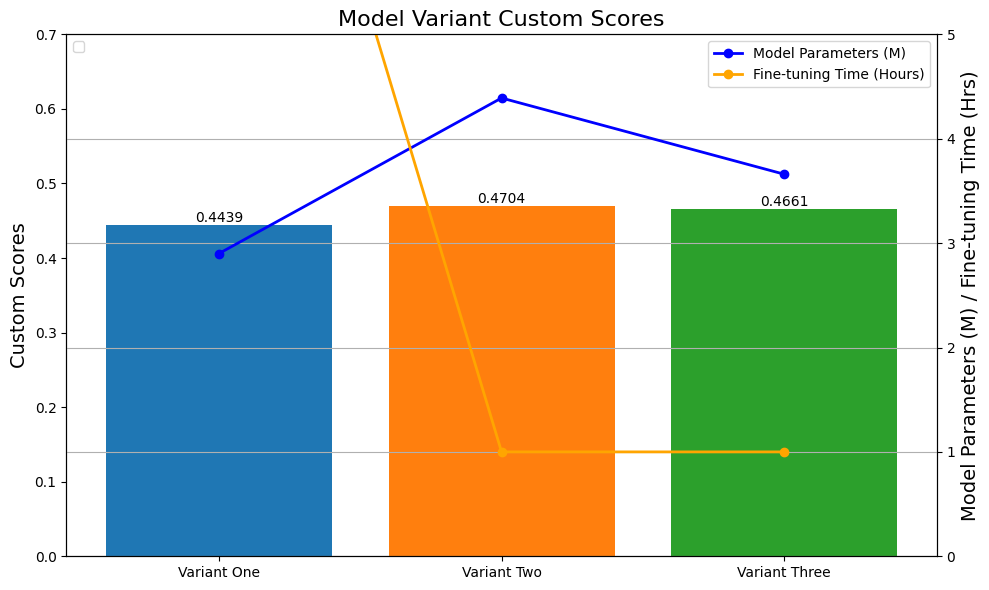

In [16]:
variants = ['Variant One', 'Variant Two', 'Variant Three']
custom_scores = [0.4439, 0.4704, 0.4661]
model_parameters = [2.9, 4.39, 3.66]
fine_tuning_times = [10, 1, 1]  # In hours for Variant Two and Three (an approximation)

# Setting up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating the bar plot for custom scores with a new color scheme
bars = ax1.bar(variants, custom_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding custom score annotations
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), 
             ha='center', va='bottom', fontsize=10)

# Configuring the primary axis
ax1.set_ylabel('Custom Scores', fontsize=14)
ax1.set_title('Model Variant Custom Scores', fontsize=16)
ax1.set_ylim(0, 0.7)

# Creating a secondary axis for model parameters and fine-tuning times
ax2 = ax1.twinx()
ax2.plot(variants, model_parameters, color='blue', marker='o', label='Model Parameters (M)', linewidth=2)
ax2.plot(variants, fine_tuning_times, color='orange', marker='o', label='Fine-tuning Time (Hours)', linewidth=2)

# Customizing the secondary axis
ax2.set_ylabel('Model Parameters (M) / Fine-tuning Time (Hrs)', fontsize=14)
ax2.set_ylim(0, 5)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Displaying the plot
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('model_variant_custom_scores.png', dpi=300)  # Save as PNG with high resolution
# plt.savefig('model_variant_custom_scores.pdf')  # Uncomment to save as PDF if needed

# Show the plot (optional, can be removed if only saving is needed)
plt.show()